In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.signal import butter, filtfilt

# dat = pd.read_excel('13-4-22.xls')
dat = pd.read_excel('Acceleration without g 2022-04-18 09-34-53.xls')
# dat = dat.drop(dat.columns[[0,4]], axis= 1, inplace= True)
dt = dat.to_numpy()
t, xa, ya, za, amg = dt.T

In [2]:
print(dat)

         Time (s)  Linear Acceleration x (m/s^2)  \
0        0.012297                       0.037288   
1        0.022376                       0.036137   
2        0.032455                       0.031034   
3        0.042534                       0.030206   
4        0.052613                       0.027450   
...           ...                            ...   
18845  189.951269                      -0.016277   
18846  189.961348                      -0.023680   
18847  189.971427                      -0.010876   
18848  189.981506                      -0.011394   
18849  189.991586                      -0.012574   

       Linear Acceleration y (m/s^2)  Linear Acceleration z (m/s^2)  \
0                           0.042733                       0.030649   
1                           0.043803                       0.027801   
2                           0.042118                       0.035428   
3                           0.044967                       0.039615   
4                   

In [3]:
dat.dtypes

Time (s)                         float64
Linear Acceleration x (m/s^2)    float64
Linear Acceleration y (m/s^2)    float64
Linear Acceleration z (m/s^2)    float64
Absolute acceleration (m/s^2)    float64
dtype: object

<AxesSubplot:xlabel='Time (s)'>

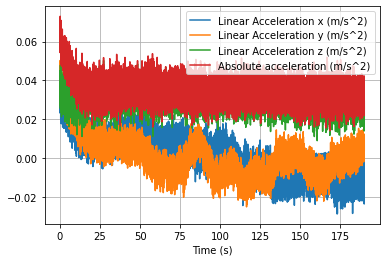

In [4]:
dat = dat.set_index('Time (s)')
%matplotlib inline
dat.plot(grid='on')

In [5]:
# No 1
# Mencari sumbu accelerometer yang dominan saat terdapat kendaraan lewat.

Ax = dat['Linear Acceleration x (m/s^2)']
Ay = dat['Linear Acceleration y (m/s^2)']
Az = dat['Linear Acceleration z (m/s^2)']

n = len(dat) - 1

# for i in np.arrange(len(dat)-1):
# for i+1 in n:

oldAx = Ax

Ax = Ax-(Ax.sum(axis=0)/(len(Ax)-1))
Ay = Ay-(Ay.sum(axis=0)/(len(Ay)-1))
Az = Az-(Az.sum(axis=0)/(len(Az)-1))

newAx = Ax
# Sum ax terus

In [6]:
# Pembuktian sebelum dan sesudah pengurangan rata-rata
print(oldAx.head())
print(newAx.head())

Time (s)
0.012297    0.037288
0.022376    0.036137
0.032455    0.031034
0.042534    0.030206
0.052613    0.027450
Name: Linear Acceleration x (m/s^2), dtype: float64
Time (s)
0.012297    0.035839
0.022376    0.034688
0.032455    0.029585
0.042534    0.028757
0.052613    0.026000
Name: Linear Acceleration x (m/s^2), dtype: float64


In [7]:
print(Ax)

Time (s)
0.012297      0.035839
0.022376      0.034688
0.032455      0.029585
0.042534      0.028757
0.052613      0.026000
                ...   
189.951269   -0.017726
189.961348   -0.025129
189.971427   -0.012325
189.981506   -0.012843
189.991586   -0.014023
Name: Linear Acceleration x (m/s^2), Length: 18850, dtype: float64
